# **Algoritmos de Inteligência Artificial aplicados à classificação**



# 1. O que é Machine Learning (ou Aprendizado de Máquina?)

É a área da ciência da computação dedicada aos algoritmos que permitem computadores *aprenderem dos dados*, Ou de maneira mais técnica: *um computador é dito que aprende de uma experiência E a realizar uma tarefa T medida por uma performance P, se a performance em T, medida por P, melhora com experiências do tipo E*

## 1.1. Por que usar Machine Learning?

Dependendo da situação, construir uma lista de regras explícitas podem ser complicadas para um sistema computacional, o que também é bem difícil de manter. Se ao contrário, focarmos nos *padrões* que determinam uma certa situação, podemos construir algoritmos focados no reconhecimento desses padrões e aí sim, esses sistemas tornam-se "mais simples".

Isso também vale para as questões de atualização dos padrões. Atualizar a lista de regras pode ser extremamente custoso, além de ser fisicamente inviável na maioria das situações práticas que encontramos na vida real. Mas realizar um *re-treinamento* dos modelos de Machine Learning pode ser mais "fácil" e gerar resultados mais confiáveis.

Outro motivo: o problema em si é extremamente complexo para abordagens tradicionais ou nem podem possuir abordagens conhecidas. Ou uma terceira situação: a abordagem conhecida pode ser impossibilitada pelo desconhecido dos parâmetros necessários (custo ou tecnologias protegidas por exemplo).

Algorimos de ML podem ser inspecionados para que nós possamos entender como eles tomaram as decisões, inclusive gerando correlações impensadas anteriormente, o que pode levar a um melhor entendimento do problema ou descobertas de padrões que não eram imediatamente claros.

## 1.2. Tipos de Sistemas de Machine Learning

Existem muitas formas de se agrupar os diferentes algoritmos e abordagens de Machine Learning:

- por tipo de supervisão do treinamento  - supervisionados; não supervisionados; semi-supervisionados e aprendizado por reforço
    - Classificação x Regressão (supervisionado)
    - Clusterização; Detecção de anomalias; Técnicas de redução de dimensionalidade por projeção; Regras de associação
    - *Deep Belief Networks* -> mistura de supervisionado com não supervisionado
    - Um agente pode observar o ambiente, selecionar e desenvolver ações, recebendo ações ou penalidades. Eles devem aprender por si mesmo as melhores estratégias para maximizar a recompensa -> aprendizado por reforço
- por tipo de frequência de aprendizado - online ou lotes
    - online -> sistema capaz de aprender incrementalmente, dados contínuos, sendo necessário a adaptação rápida e autônoma; dependente do *learning rate*
    - offline ou lotes -> offline learning
- por forma de funcionamento - simples comparação com dados históricos ou pela detecção e cálculo de um modelo matemático
    - comparação - baseados em similaridade
    - modelo matemático - existe uma equação ou lógica por trás da tomada de decisão
        - função de ajuste ou função de custo

## 1.3. Principais Desafios para Machine Learning

- Quantidade insuficiente de dados -> principalmente para problemas complexos como NLP e visão computacional
    - obter dados é caro
- Dados não representativos -> dados com ruídos ou enviesados são comuns
- Dados de baixa qualidade -> dados com erros, dados com ruído, outliers, medições de baixa qualidade
    - Investimento de tempo em limpeza e padronização de dados
- Atributos irrelevantes -> se os atributos não possuírem informação relevante, não podemos construir modelos bons
    - Seleção de atributos; extração de atributos; engenharia de atributos
- Sobreajuste dos dados -> supergeneralização
    - Comuns em modelos muito complexos
- Subajuste -> baixa generalização ou "falta de aprendizado"
    - Quando o modelo é simples demais para os dados


## **1. Introdução ao Problema de Classificação**

A classificação é um dos pilares fundamentais da Ciência de Dados, desempenhando um papel crucial na tomada de decisões, resolução de problemas e automação de tarefas em uma variedade de campos, como medicina, finanças, marketing, visão computacional e muito mais. Na essência, a classificação é o processo de categorizar dados em grupos ou classes com base em características ou atributos específicos.

Imagine, por exemplo, que você seja um gerente de um e-commerce e deseja prever se um cliente específico fará ou não uma compra com base no histórico de compras e comportamento de navegação. Como a nossa mente procede?

Perceba que, para tomar a decisão a respeito de uma potencial compra, precisamos primeiramente saber qual o tipo de pessoa já comprou no passado? Ou seja, precisamos, primariamente, da informação de que houve a compra ou não. Em segundo lugar, precisamos das características dos compradores e dos não compradores também.

A classificação é uma técnica supervisionada, o que significa que ela exige dados de treinamento rotulados para aprender e construir um modelo que possa prever as classes ou categorias corretas para novos dados não rotulados.

*Em síntese, a classificação é a abordagem da criação de uma função $f$ a partir de um conjunto de treinamento $(X, Y)$, de forma que para cada novo vetor de entradas $\vec{X}$, seja atribuída um rótulo mutuamente exclusivo e discreto $Y$.*

- para o problema de compra / não compra, o $X$ seriam as características do potencial comprador, e o $Y$ seria uma informação binária comprou (1) / não comprou (0).
- podemos ter um problema de cunho industrial, onde o $Y$ seriam categorias de falhas (0 - sem falha, 1 - falha leve, 2 - falha crítica) e os $X$ seriam padrões de vibração medidos por instrumentos.
- e na classificação de imagens?

## **2. Separabilidade Linear**

A separabilidade linear é um conceito fundamental no aprendizado de máquina e envolve a capacidade de dividir dados em duas ou mais classes com uma linha reta ou um hiperplano. Pense nisso como traçar uma linha invisível em um gráfico para separar grupos de pontos. Isso é semelhante à regressão linear, onde tentamos encontrar uma linha reta que melhor se ajuste aos dados. A diferença principal é que, na regressão linear, estamos tentando prever um valor contínuo, como o preço de uma casa com base em características como tamanho e número de quartos, enquanto na separabilidade linear, estamos tentando classificar dados em categorias discretas, como "sim" ou "não".


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# importando o dataset iris
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# avaliando as espécies
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

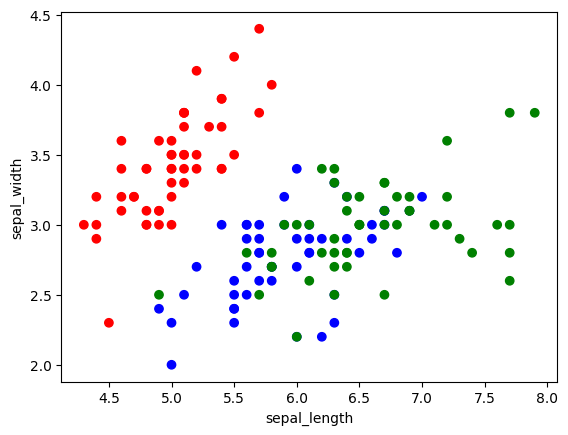

In [22]:
colormap = {
    'setosa': 'red',
    'versicolor': 'blue',
    'virginica': 'green'
}

i, j = 0, 1

plt.scatter(x=iris.iloc[:, i], y=iris.iloc[:, j], c=iris.species.map(colormap))
plt.xlabel(iris.columns[i])
plt.ylabel(iris.columns[j])
plt.show()

A separabilidade linear de um conjunto de dados é um item bem importante a ser verificado, pois pode ajudar a determinar qual será o modelo a ser utilizado para construir a solução. E por que isso é importante?

## **3. Principais Métricas de Classificação**

Assim como um modelo de regressão, como a regressão linear, os modelos de classificação também podem ser analisados e avaliados por meio de métricas de desempenho.

- qual seria a melhor métrica de avaliação de desempenho?



### *3.1. Conceito de Viés e Variância - para classificação*

- **Viés (Bias) na Classificação**:
   - Em um modelo de classificação com alto viés, como uma regressão logística simples, supomos que a relação entre as características de entrada e os rótulos de classe é muito simples. Isso pode resultar em um modelo que não consegue capturar a complexidade dos dados. Por exemplo, se estamos tentando classificar imagens de gatos e cachorros com base apenas na altura, um modelo com alto viés pode assumir erroneamente que a altura é a única característica importante, ignorando outras informações relevantes, como a forma e a cor dos animais.

   - Como resultado, o modelo terá um desempenho fraco, classificando incorretamente muitos exemplos. O erro de viés pode ser observado quando o modelo não consegue se ajustar bem aos dados de treinamento e comete erros sistemáticos, como classificar a maioria dos gatos como cães.

- **Variância (Variance) na Classificação**:
   - Em um modelo de classificação com alta variância, como uma árvore de decisão profunda, o modelo pode se ajustar demais aos dados de treinamento. Isso significa que o modelo leva em consideração até mesmo o ruído nos dados, criando uma fronteira de decisão excessivamente complexa e específica para o conjunto de treinamento.

   - O erro de variância pode ser observado quando o modelo tem um desempenho excelente nos dados de treinamento, mas um desempenho ruim em novos dados. Por exemplo, uma árvore de decisão profunda pode criar regras extremamente complexas para classificar imagens de gatos e cachorros, levando a resultados inconsistentes e incorretos em novos exemplos que não se encaixam precisamente nas regras do modelo.

### *3.2. - Métricas de Viés*

As métricas de viés para classificação estão relacionadas com a quantidade de acertos que o modelo é capaz de relizar para uma determinada base de dados. Geralmente são representadas em frações, de forma a normalizar os valores.

1. **Acurácia (Accuracy)**:
   - Mede a proporção de exemplos classificados corretamente em relação ao total de exemplos. A fórmula é: `Acurácia = (TP + TN) / (TP + TN + FP + FN)`, onde TP são verdadeiros positivos, TN são verdadeiros negativos, FP são falsos positivos e FN são falsos negativos.

2. **Precisão (Precision)**:
   - Mede a proporção de exemplos classificados como positivos que são realmente positivos. A fórmula é: `Precisão = TP / (TP + FP)`, onde TP são verdadeiros positivos e FP são falsos positivos.

3. **Recall (Sensibilidade ou Revocação)**:
   - Mede a proporção de exemplos positivos que foram corretamente classificados como positivos. A fórmula é: `Recall = TP / (TP + FN)`, onde TP são verdadeiros positivos e FN são falsos negativos.

4. **F1-Score**:
   - O F1-Score é a média harmônica da precisão e do recall. A fórmula é: `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`.

5. **Matriz de Confusão**:
   - A matriz de confusão é uma tabela que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

### *3.3 - Métricas de Variância*

As métricas de variância estão relacionadas à sensibilidade do modelo em modificar as métricas de desempenho conforme a mudança do limiar de decisão. As mais conhecidas são:

1. **AUC-ROC (Área sob a Curva da Característica de Operação do Receptor)**: A AUC-ROC mede a capacidade do modelo de distinguir entre classes. É uma área sob a curva ROC, que representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos para diferentes limiares de classificação.

2. **Curva Precision-Recall:** *A* curva Precision-Recall representa a relação entre precisão e recall para diferentes limiares de classificação.

## **4. Introdução à Regressão Logística**

A regressão logística é um algoritmo de aprendizado supervisionado amplamente utilizado para problemas de classificação, em que o objetivo é prever a probabilidade de um exemplo de dados pertencer a uma classe específica. Apesar de seu nome, a regressão logística é usada para tarefas de classificação, não de regressão.

Aqui estão alguns conceitos-chave relacionados à regressão logística:

1. **Variável Dependente Binária**: A regressão logística é usada quando a variável dependente (ou alvo) é binária, o que significa que existem apenas duas classes possíveis, como "sim" ou "não", "fraude" ou "não fraude".

2. **Modelo Logit**: A regressão logística cria um modelo logit, que é a transformação logarítmica da razão das probabilidades de um exemplo pertencer a uma classe em relação à outra. O modelo logit é uma função linear das características (atributos) do exemplo.

3. **Função Sigmoide**: A função sigmoide (também chamada de função logística) é usada para transformar o resultado da regressão linear em uma probabilidade. A função sigmoide gera valores entre 0 e 1, representando a probabilidade de pertencer à classe positiva.

4. **Coeficientes e Intercepto**: Na regressão logística, são estimados coeficientes e um intercepto que definem a reta (ou hiperplano) que melhor separa as duas classes no espaço de características. Esses coeficientes são ajustados durante o treinamento do modelo.

5. **Limiar de Decisão**: Um limiar (threshold) é usado para converter a probabilidade contínua em uma decisão de classificação binária. Por exemplo, se a probabilidade for maior que 0,5, o exemplo pode ser classificado como "sim"; caso contrário, é classificado como "não".

6. **Aplicações**: A regressão logística é usada em diversas aplicações, incluindo previsão de churn (taxa de cancelamento) em empresas, diagnóstico médico, análise de sentimentos em texto e muito mais.

A regressão logística é uma técnica poderosa para problemas de classificação binária e pode ser estendida para problemas de classificação multiclasse. Ela é especialmente útil quando você deseja entender a probabilidade associada a cada classe e interpretar os efeitos das características na decisão de classificação.